In [1]:
!pip uninstall scikit-learn --yes
!pip uninstall imbalanced-learn --yes
!pip install scikit-learn==1.3.2
!pip install imbalanced-learn

Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2
Found existing installation: imbalanced-learn 0.12.2
Uninstalling imbalanced-learn-0.12.2:
  Successfully uninstalled imbalanced-learn-0.12.2
  Obtaining dependency information for scikit-learn==1.3.2 from https://files.pythonhosted.org/packages/40/c6/2e91eefb757822e70d351e02cc38d07c137212ae7c41ac12746415b4860a/scikit_learn-1.3.2-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached scikit_learn-1.3.2-cp311-cp311-macosx_12_0_arm64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-macosx_12_0_arm64.whl (9.4 MB)
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/6e/1b/66764ecf370e797759be06fb38c11640ea1f9456ae10f8640a33cfa726ea/imbalanced_learn-0.12.2-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.12.2-py3-none-any.whl.metadata (8.2 kB)
Using cached imbalanced_learn-0.12.2-py3-none-

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [3]:
%matplotlib inline
np.random.seed(27)
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [4]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [5]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [6]:
df = pd.read_csv('data.csv')

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
target = 'Class'

In [9]:
X = df.loc[:, df.columns!=target]

In [10]:
Y = df.loc[:, df.columns==target]

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.33, 
                                                    random_state=42)

Class
0    284315
1       492
Name: count, dtype: int64


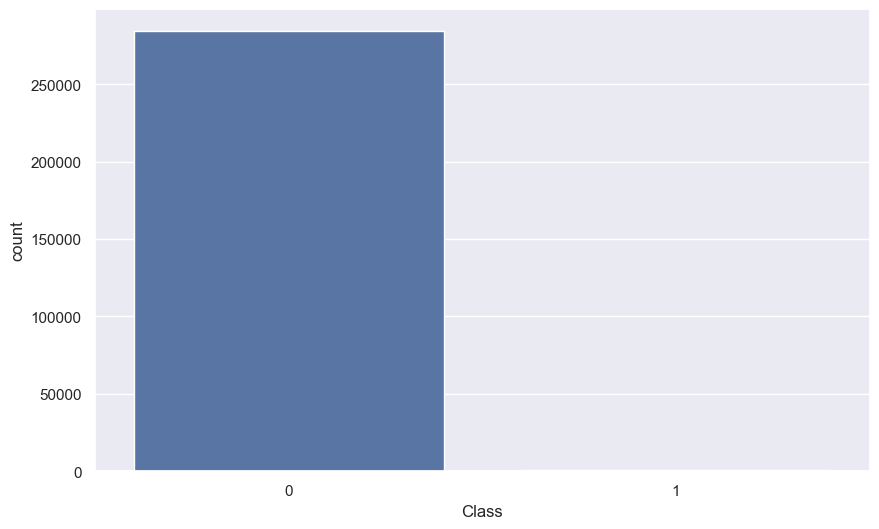

In [12]:
ax = sns.countplot(x=target, data=df)
print(df[target].value_counts())

In [13]:
100* (492/float(df.shape[0]))

0.1727485630620034

In [14]:
100* (284315/float(df.shape[0]))

99.82725143693798

In [15]:
Y_train[target].value_counts()

Class
0    190477
1       343
Name: count, dtype: int64

In [16]:
clf = LogisticRegression().fit(X_train, Y_train)

In [17]:
Y_Test_Pred = clf.predict(X_test)

In [18]:
pd.crosstab(Y_Test_Pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,93792,57
1,46,92


In [19]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9989041037590305
Precision =  0.6666666666666666
Recall =  0.6174496644295302
F1 Score =  0.6411149825783973


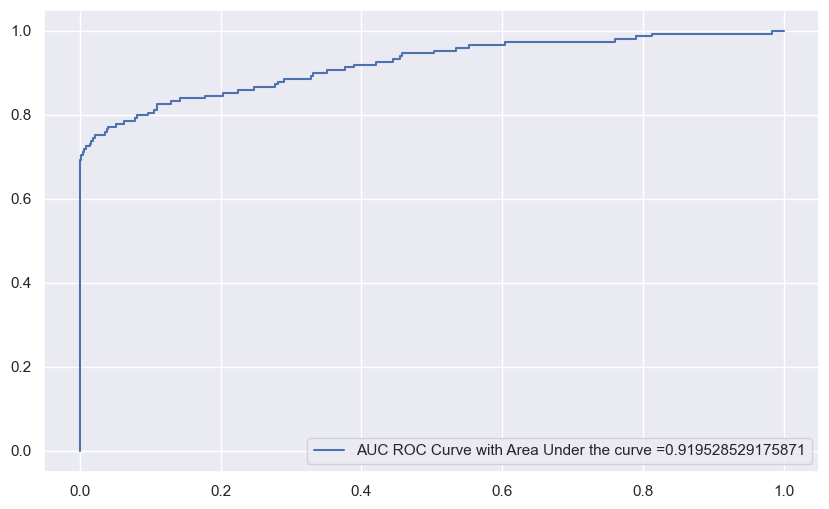

In [20]:
generate_auc_roc_curve(clf, X_test)

# class_weight='balanced'

<img src="./class_weight_inp_image.png">

In [21]:
# https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html

In [22]:
unique_classes = list(df[target].unique())
unique_classes

[0, 1]

In [23]:
out_dict = {}
for classes in unique_classes:
    out_dict[classes] = df.shape[0]/((df.loc[df[target] == classes].shape[0])
                                     *len(unique_classes))

In [24]:
out_dict

{0: 0.5008652375006595, 1: 289.4380081300813}

In [25]:
print (X_train.shape, Y_train.shape)

(190820, 30) (190820, 1)


In [26]:
clf = LogisticRegression(class_weight='balanced').fit(X_train, Y_train)

In [27]:
from sklearn.utils import class_weight

In [28]:
class_weight.compute_class_weight('balanced', classes=np.unique(Y_train), y=Y_train[target])

array([  0.50090037, 278.16326531])

In [29]:
Y_Test_Pred = clf.predict(X_test)

In [30]:
pd.crosstab(Y_Test_Pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,90719,12
1,3119,137


In [31]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9666868822283933
Precision =  0.04207616707616708
Recall =  0.9194630872483222
F1 Score =  0.08046989720998532


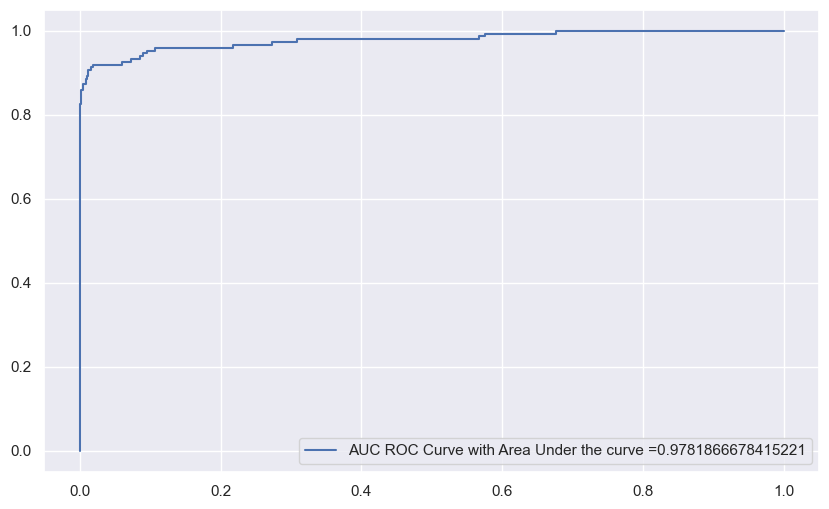

In [32]:
generate_auc_roc_curve(clf, X_test)

In [33]:
weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=5
)

grid_result = gsc.fit(X_train, Y_train)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'class_weight': {0: 0.381578947368421, 1: 0.618421052631579}}


<Axes: xlabel='weight'>

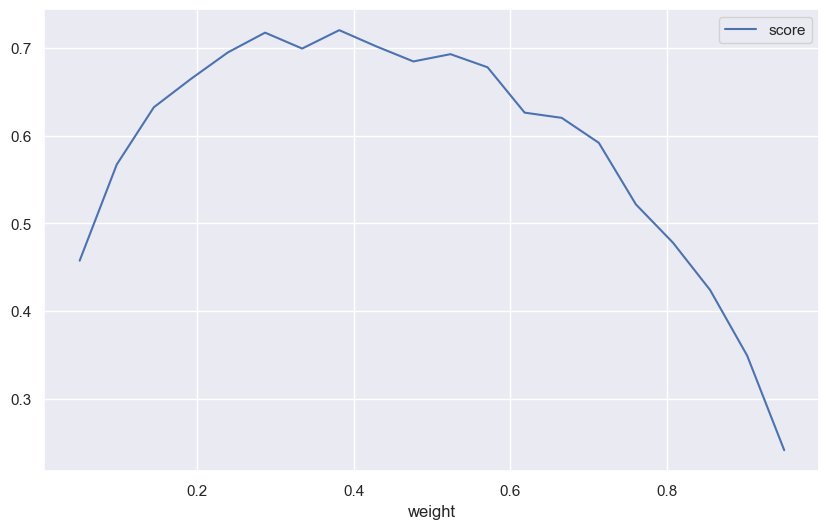

In [34]:
data_out = pd.DataFrame({'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
data_out.plot(x='weight')

In [35]:
data_out

,score,weight
0,0.457425,0.050000
1,0.567042,0.097368
2,0.632305,0.144737
3,0.664623,0.192105
4,0.694935,0.239474
5,0.717397,0.286842
6,0.699268,0.334211
7,0.720213,0.381579
8,0.701721,0.428947
9,0.684567,0.476316


In [36]:
clf = LogisticRegression(**grid_result.best_params_).fit(X_train, Y_train)

In [37]:
Y_Test_Pred = clf.predict(X_test)

In [38]:
pd.crosstab(Y_Test_Pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,93782,37
1,56,112


In [39]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9990105014523285
Precision =  0.6666666666666666
Recall =  0.7516778523489933
F1 Score =  0.7066246056782334


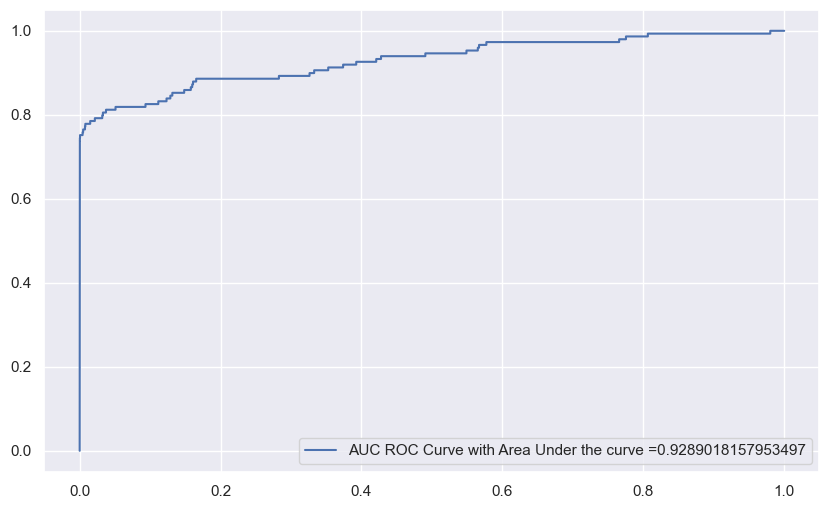

In [40]:
generate_auc_roc_curve(clf, X_test)

# SMOTE

In [41]:
unique, count = np.unique(Y_train, return_counts=True)
Y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
Y_train_dict_value_count

{0: 190477, 1: 343}

In [42]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train)

TypeError: SMOTE.__init__() got an unexpected keyword argument 'ratio'

In [ ]:
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

In [ ]:
clf = LogisticRegression().fit(x_train_res, y_train_res)

In [ ]:
Y_Test_Pred = clf.predict(X_test)

In [ ]:
pd.crosstab(Y_Test_Pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])

In [ ]:
generate_model_report(Y_test, Y_Test_Pred)

In [ ]:
generate_auc_roc_curve(clf, X_test)

In [ ]:
weights = np.linspace(0.005, 0.25, 10)
weights

In [ ]:
pipe = make_pipeline(
    SMOTE(),
    LogisticRegression()
)

weights = np.linspace(0.005, 0.25, 10)

gsc = GridSearchCV(
    estimator=pipe,
    param_grid={
        'smote__ratio': weights
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(X_train, Y_train)

print("Best parameters : %s" % grid_result.best_params_)
weight_f1_score_df = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                                   'weight': weights })
weight_f1_score_df.plot(x='weight')

In [ ]:
pipe = make_pipeline(
    SMOTE(ratio=0.005),
    LogisticRegression()
)

pipe.fit(X_train, Y_train)

Y_Test_Pred = pipe.predict(X_test)

In [ ]:
pd.crosstab(Y_Test_Pred, Y_test[target], 
            rownames=['Predicted'], colnames=['Actual'])

In [ ]:
generate_model_report(Y_test, Y_Test_Pred)

In [ ]:
generate_auc_roc_curve(clf, X_test)

# UNDERSAMPLING

In [ ]:
minority_class_len = len(df[df[target] == 1])
print(minority_class_len)

In [ ]:
majority_class_indices = df[df[target] == 0].index
print(majority_class_indices)

In [ ]:
random_majority_indices = np.random.choice(majority_class_indices,
                                           minority_class_len, 
                                           replace=False)
print(len(random_majority_indices))

In [ ]:
minority_class_indices = df[df[target] == 1].index
print(minority_class_indices)

In [ ]:
under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])

In [ ]:
under_sample = df.loc[under_sample_indices]

In [ ]:
sns.countplot(x=target, data=under_sample)

In [ ]:
X = under_sample.loc[:, df.columns!=target]
Y = under_sample.loc[:, df.columns==target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
clf = LogisticRegression().fit(X_train, Y_train)
Y_Test_Pred = clf.predict(X_test)

In [ ]:
generate_model_report(Y_test, Y_Test_Pred)

In [ ]:
generate_auc_roc_curve(clf, X_test)